In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Using inspector to find columns and data types
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for x in columns:
    print(x['name'], x["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Find the most recent date in the data set.
newest_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
newest_date

('2017-08-23')

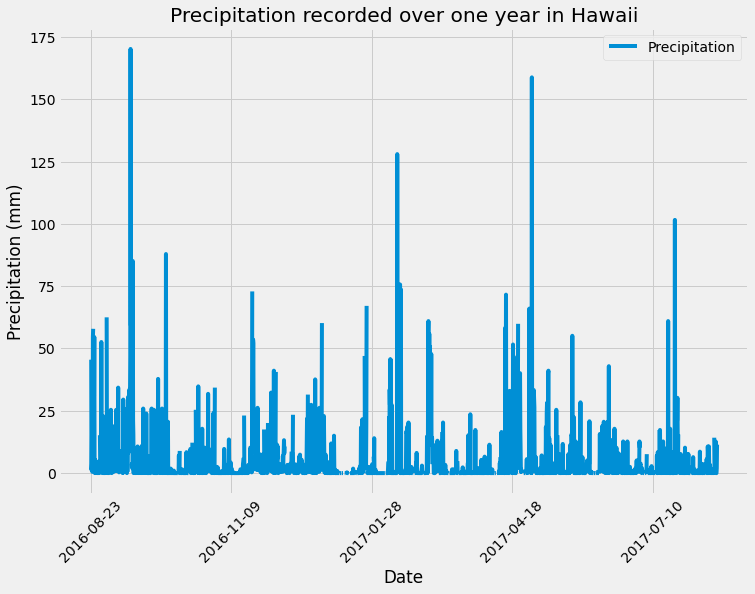

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago

# Perform a query to retrieve the data and precipitation scores
year_query = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(year_query, columns=["Date", "Precipitation"])
prcp_df = prcp_df.set_index("Date")
# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by=["Date"])

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(title="Precipitation recorded over one year in Hawaii", rot=45, figsize=(11,8))
plt.ylabel("Precipitation (mm)")
plt.xlabel("Date")
plt.show()


In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()


,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number stations in the dataset
station_number = session.query(measurement.station).distinct().count()
station_number

9

In [25]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = session.query(measurement.station, func.count(measurement.id)).group_by(measurement.station).order_by(func.count(measurement.id).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
max_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == station_activity[0][0]).all()
min_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == station_activity[0][0]).all()
avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == station_activity[0][0]).all()

print(f"Station {station_activity[0][0]} recorded a maximum temperature of {max_temp[0][0]} (C), and a minimum temperature of {min_temp[0][0]} (C). With an average temperature of {avg_temp[0][0]} (C).")

Station USC00519281 recorded a maximum temperature of 29.4 (C), and a minimum temperature of 12.2 (C). With an average temperature of 22.03582251082252 (C).


Text(0.5, 1.0, 'Temperature frequencies at Station USC00519281 over 12 months')

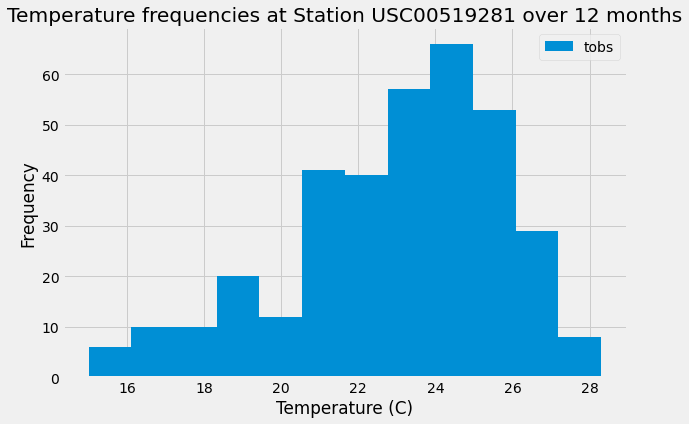

In [36]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_year = session.query(measurement.date, measurement.tobs).filter_by(station = station_activity[0][0]).filter(measurement.date >= year_ago).all()
station_year_df = pd.DataFrame(station_year)

station_year_df.plot(kind="hist", bins=12, figsize=(9,6))
plt.xlabel("Temperature (C)")
plt.title(f"Temperature frequencies at Station {station_activity[0][0]} over 12 months")

# Close session

In [ ]:
# Close Session
session.close()